In [1]:
import pandas as pd #for data manipulation
import requests #send http requests to fetch live data
import matplotlib.pyplot as plt
from datetime import datetime
import time

In [ ]:
import requests
import time
from datetime import datetime

URL = "https://your-api-endpoint.com/data"

def fetch_data():
    try:
        response = requests.get(URL)
        response.raise_for_status()
        data = response.json()  # or response.text if not JSON
        print(f"[{datetime.now()}] Data fetched successfully.")
        # Process or store the data here
        return data
    except requests.RequestException as e:
        print(f"[{datetime.now()}] Error fetching data: {e}")
        return None

if __name__ == "__main__":
    while True:
        fetch_data()
        time.sleep(1800)  # 1800 seconds = 30 minutes


In [ ]:
# to schedule every 30 mins
import requests
import time
from datetime import datetime

URL = "https://your-api-endpoint.com/data"

def fetch_data():
    try:
        response = requests.get(URL)
        response.raise_for_status()
        data = response.json()  # or response.text if not JSON
        print(f"[{datetime.now()}] Data fetched successfully.")
        # Process or store the data here
        return data
    except requests.RequestException as e:
        print(f"[{datetime.now()}] Error fetching data: {e}")
        return None

if __name__ == "__main__":
    while True:
        fetch_data()
        time.sleep(1800)  # 1800 seconds = 30 minutes


In [2]:
url = 'https://api.coingecko.com/api/v3/simple/price?ids=bitcoin&vs_currencies=usd'
response = requests.get(url)
data = response.json()
data

{'bitcoin': {'usd': 118686}}

In [5]:
price = data['bitcoin']['usd']
price

119925

In [3]:
def fetch_price(): #words are conected using
    try:
        url = 'https://api.coingecko.com/api/v3/simple/price?ids=bitcoin&vs_currencies=usd'
        response = requests.get(url)
        data = response.json()
        price = data['bitcoin']['usd']
        return price
    except Exception as e:
         print(f"Error while fetching the data: {e}")
         return none
        
    

In [5]:
price_log = pd.DataFrame(columns=['timestamp','price'])
price_log

,timestamp,price


In [6]:
for _ in range(30):
    now = datetime.now()
    price = fetch_price()
    if price:
        price_log = pd.concat([price_log, pd.DataFrame([[now, price]], columns=['timestamp', 'price'])])
        print(f"{now.strftime('%H:%M:%S')} -> ${price}")
    else:
        print(f"{now.strftime('%H:%M:%S')} -> Did not Fetch")
    time.sleep(10)
                               
                               

C:\Users\Birendra\AppData\Local\Temp\ipykernel_15164\1063349579.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  price_log = pd.concat([price_log, pd.DataFrame([[now, price]], columns=['timestamp', 'price'])])


19:02:45 -> $118708
19:02:56 -> $118708
19:03:06 -> $118708
19:03:16 -> $118708
19:03:26 -> $118708
19:03:36 -> $118705
19:03:46 -> $118705
Error while fetching the data: 'bitcoin'


NameError: name 'none' is not defined

In [7]:
price_log['MA_5'] = price_log['price'].rolling(window=5).mean()

In [8]:
from scipy.stats import zscore
price_log['zscore'] = zscore(price_log['price'].fillna(method='bfill'))

C:\Users\Birendra\AppData\Local\Temp\ipykernel_15164\1645107754.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  price_log['zscore'] = zscore(price_log['price'].fillna(method='bfill'))
C:\Users\Birendra\AppData\Local\Temp\ipykernel_15164\1645107754.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  price_log['zscore'] = zscore(price_log['price'].fillna(method='bfill'))


In [10]:
price_log['zscore']

0    0.632456
0    0.632456
0    0.632456
0    0.632456
0    0.632456
0   -1.581139
0   -1.581139
Name: zscore, dtype: float64

In [11]:
price_log['anomaly'] = price_log['zscore'].apply(lambda x: abs(x) > 2)
price_log['anomaly']

0    False
0    False
0    False
0    False
0    False
0    False
0    False
Name: anomaly, dtype: bool

In [12]:
plt.figure(figsize=(12,6)) #always in inches

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

(array([20292.79363426, 20292.79375   , 20292.79386574, 20292.79398148,
        20292.79409722, 20292.79421296]),
 [Text(20292.79363425926, 0, '19:02:50'),
  Text(20292.79375, 0, '19:03:00'),
  Text(20292.79386574074, 0, '19:03:10'),
  Text(20292.79398148148, 0, '19:03:20'),
  Text(20292.79409722222, 0, '19:03:30'),
  Text(20292.794212962963, 0, '19:03:40')])

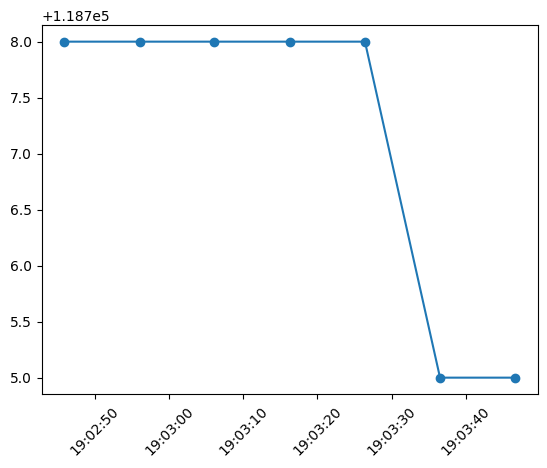

In [13]:
plt.plot(price_log['timestamp'],price_log['price'], marker='o')
plt.xticks(rotation=45) #to change label in vertical line

(array([20292.79409722, 20292.79415509, 20292.79421296, 20292.79427083]),
 [Text(20292.79409722222, 0, '19:03:30'),
  Text(20292.794155092593, 0, '19:03:35'),
  Text(20292.794212962963, 0, '19:03:40'),
  Text(20292.794270833332, 0, '19:03:45')])

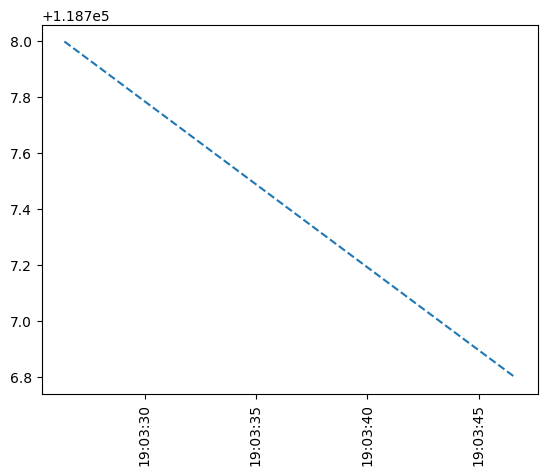

In [14]:
plt.plot(price_log['timestamp'],price_log['MA_5'], label = 'Pmoving Average 5', linestyle = '--')
plt.xticks(rotation=90) #to change label in vertical line

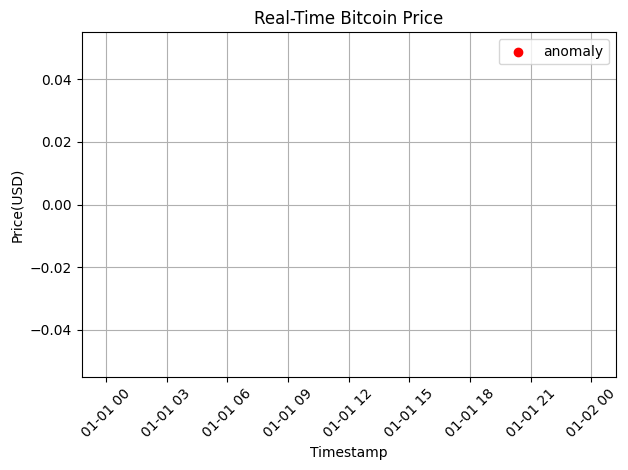

In [15]:
plt.scatter(price_log[price_log['anomaly']]['timestamp'],
           price_log[price_log['anomaly']]['price'],
           color='red', label='anomaly', zorder=5)
plt.xticks(rotation = 45)
plt.title("Real-Time Bitcoin Price")
plt.xlabel("Timestamp")
plt.ylabel("Price(USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.show()

In [16]:
price_log[price_log['anomaly']]['timestamp']


Series([], Name: timestamp, dtype: datetime64[ns])

In [17]:
price_log[price_log['anomaly']]['price']

Series([], Name: price, dtype: object)

C:\Users\Birendra\AppData\Local\Temp\ipykernel_15164\2949042927.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


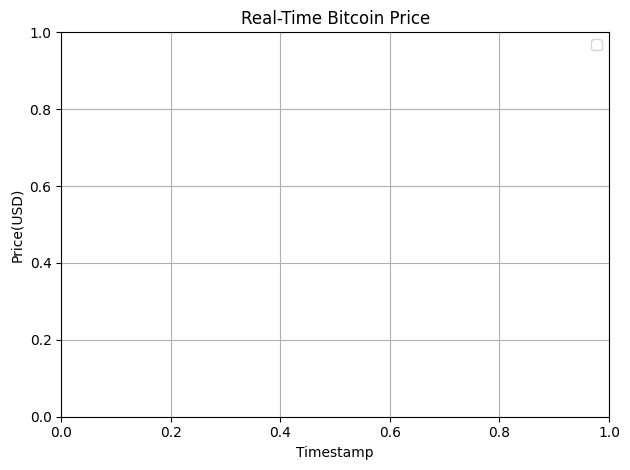

In [18]:
plt.title("Real-Time Bitcoin Price")
plt.xlabel("Timestamp")
plt.ylabel("Price(USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
if len(price_log) >=3:
    try:
        decompose = seasonal_decompose(price_log['price'].fillna(method='bfill'),model='additive',period=5)
        decompose.plot()
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Decomposition Failed: {e}")

else:
    print("Not enough data ")

Decomposition Failed: name 'seasonal_decompose' is not defined
